In [125]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [126]:
#Prepare a prediction model for profit of 50_startups data.
#do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [127]:
# Load the dataset using pandas
data=pd.read_csv("E:\MLR/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [128]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [129]:
# renaming the variables for my ease of writing syntax
new_df=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
new_df

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [130]:
new_df[new_df.duplicated()] 

# No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [131]:
# we can also use the describe inbuilt function to get statistics of the data.

new_df.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [132]:
# we use corr function to check the relationship among two variables

new_df.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


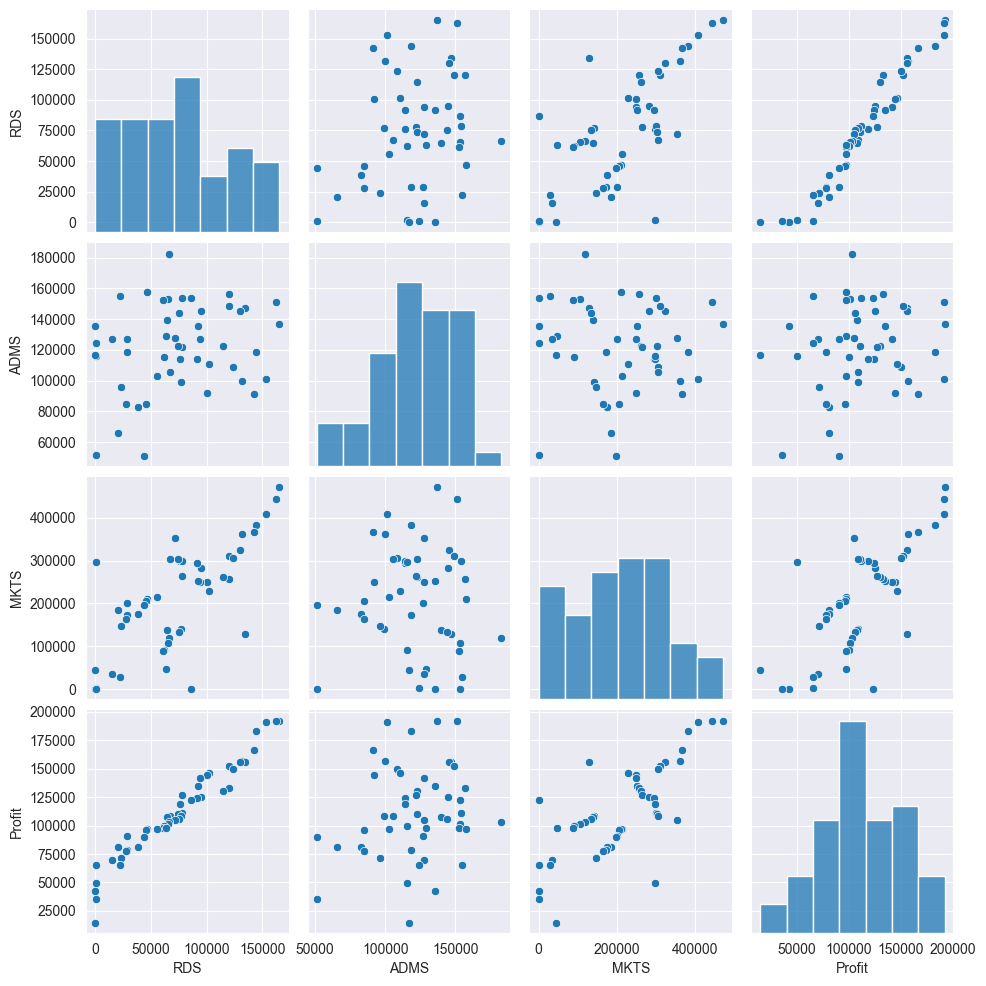

In [133]:
# instead of writing code to check the relation between each variables with another we can go with pair plot and see the biivariate relationship
sns.set_style(style='darkgrid')
sns.pairplot(new_df)

In [134]:
# make a prediction model for predicting profit of 50_startups data.
# making the pridiction model using ordinary least square method
model=smf.ols("Profit~RDS+ADMS+MKTS",data=new_df).fit()

In [135]:
# Coefficient parameters i.e intercept and slope
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [136]:
# tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [137]:
# Rsquared and Rsquared adjusted

model.rsquared , model.rsquared_adj

# Model accuracy is 94.75%which is condidered as good.

(0.9507459940683246, 0.9475337762901719)

In [138]:
model.summary()

# checking the model summary if there are any p values that are greater than 5 if so we have to remove the variable from the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 20 May 2023   Prob (F-statistic):           4.53e-30
Time:                        13:52:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# as we have more number of variables there might be a chance of having multicollinearity issues between the x variables(independant varaibles)
# for checking collinearity between x variables we have a value called as vif(variance inflation factor) if vif>20 then we have multicollinearity issue
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=new_df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=new_df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=new_df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


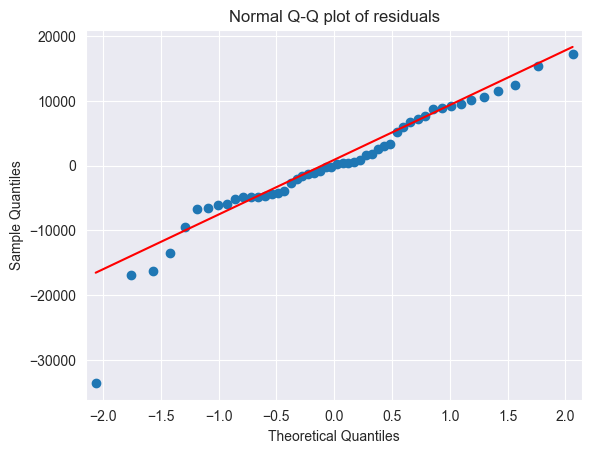

In [140]:
# therefore the data has no multicollinearity issues
# do transformations for getting better predictions of profit as mentioned in problem statement
# we can perform Residual Analysis to remove errors and get us the best performance score
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# drawing a qqplot to see the residuals from the data

In [141]:
list(np.where(model.resid<-30000))

# there are not many residuals present in the data so we can try other techniques to improve our mlr performance

[array([49], dtype=int64)]

In [142]:
# Test for Homoscedasticity or Heteroscedasticity

def standard_values(vals) : return (vals-vals.mean())/vals.std()  

# giving input from my end as z = (x - mu)/sigma


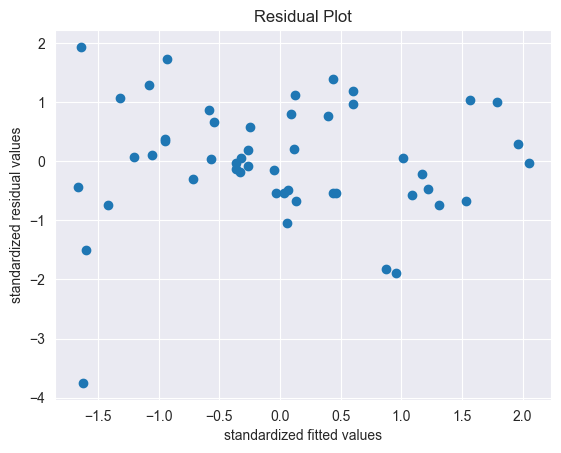

In [143]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# plotting an integrated residual scatter plot

eval_env: 1


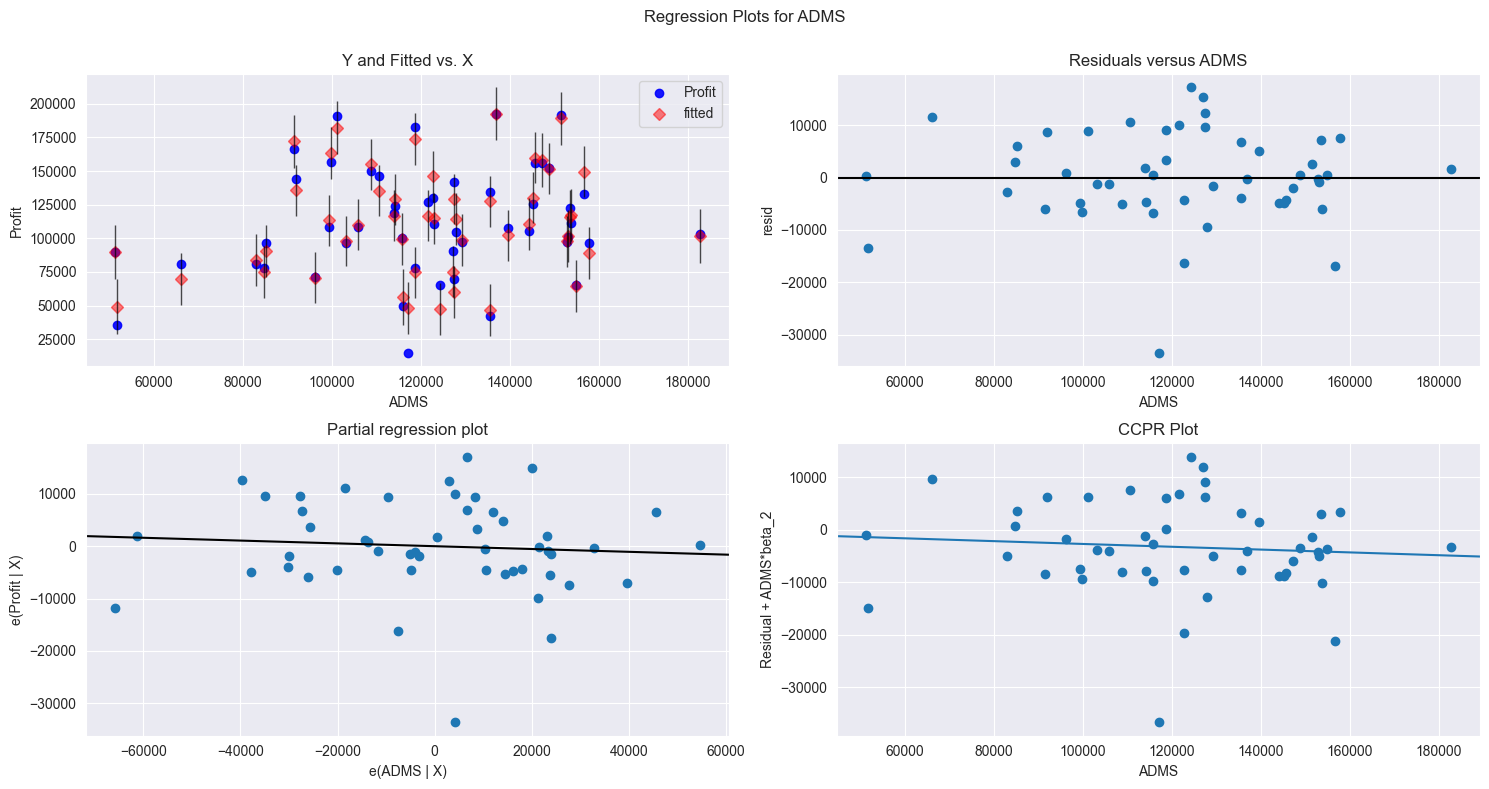

In [144]:
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
# to check the exog(independant variables) residuals when they predict y_varibles using regression plot
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


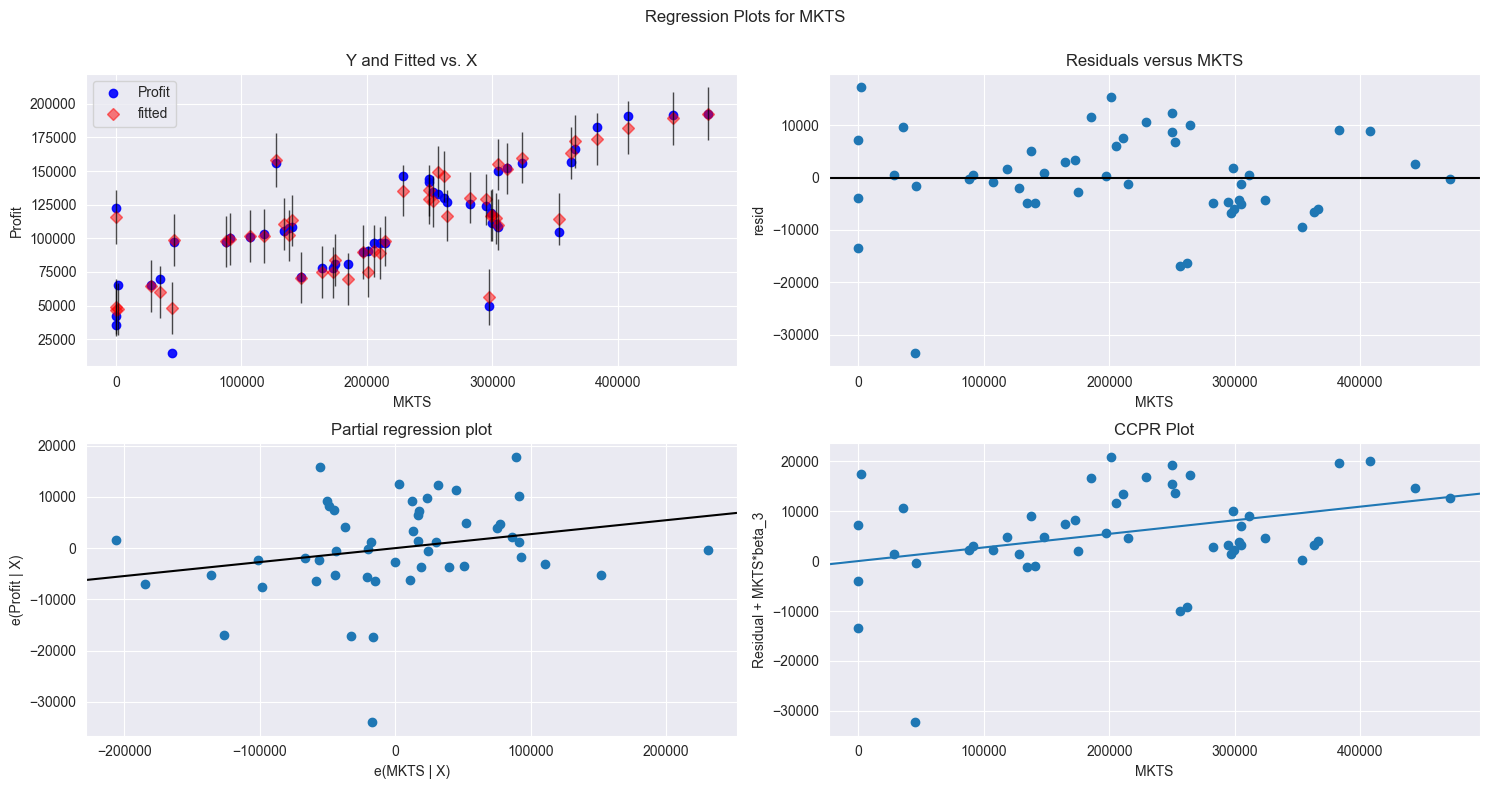

In [145]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [146]:
# we can see that there are errors in the x-variables while predicting y-variables
# now in order to remove this errors/outliers we are going to use cook's distance method
# According to cook'd distanec method If Cook's distance > 1, then it's an outlier
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

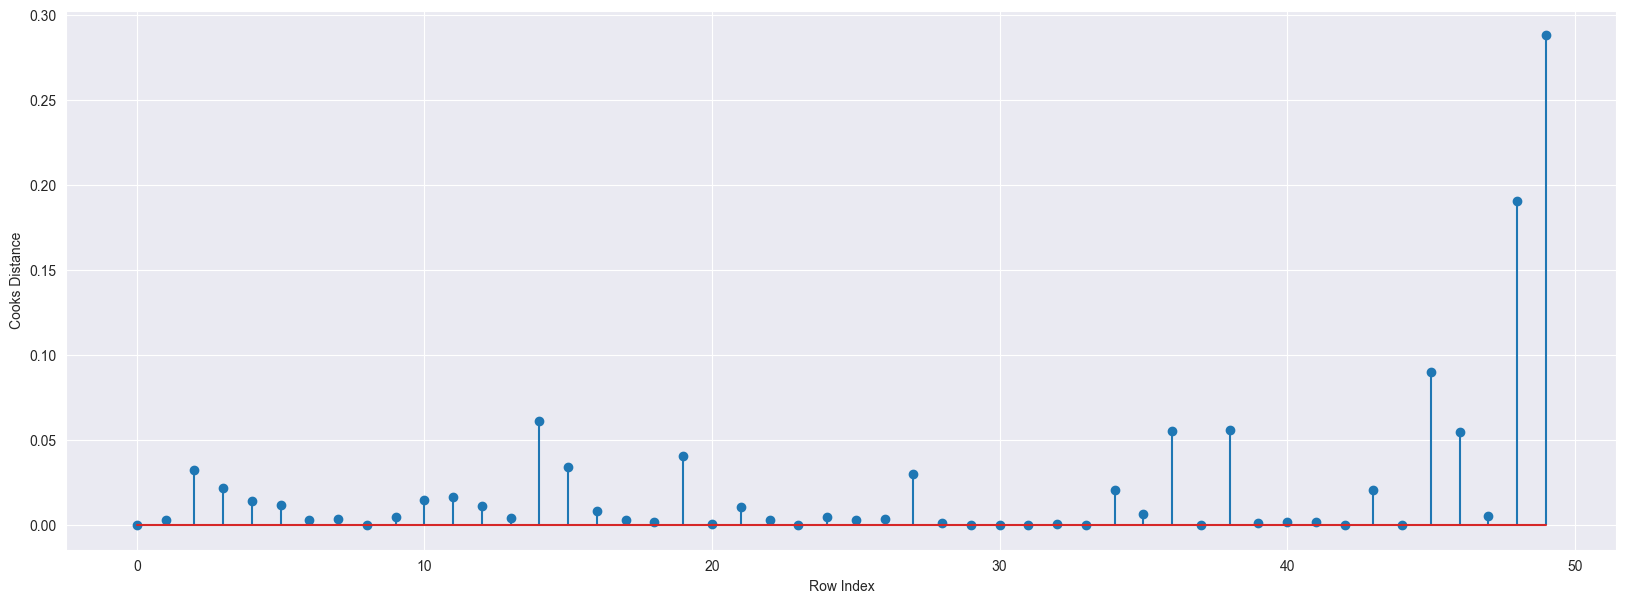

In [147]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(new_df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [148]:
# Index and value of outlier where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

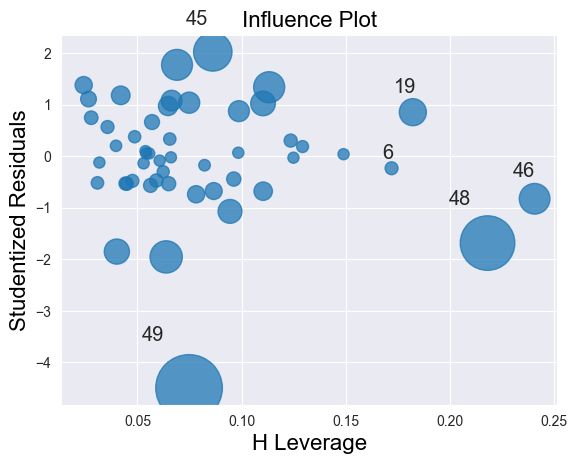

In [149]:
# we may have many other outliers where c<0.5 to see the influence of the outlier on our prediction model we heve to see the influence plot
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()


In [150]:
# rule of thumb leverage cutoff value more than 3p/n and less than 2p/n
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=new_df.shape[1]
n=new_df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.36

In [151]:
# removing the data points which are influencers and rearranging the index values(reset_index(drop=True))
final_df=new_df.drop(new_df.index[[49]],axis=0).reset_index(drop=True)
final_df


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73


In [152]:
# now finally fitting the model after removing the highest infuencing point
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=final_df).fit()

In [153]:
model2.rsquared
# we can see that our performance metrics score has increased


0.9613162435129847

In [154]:
# if we want to further increase the score we can do that by elinminating each and every influencing point using loops or we can go one by one
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=final_df).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        final_df=final_df.drop(final_df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        final_df
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=final_df).fit()
        final_model.rsquared , final_model.aic
        print("Your model accuracy is improved to",final_model.rsquared)


Your model accuracy is improved to 0.9626766170294073
Your model accuracy is improved to 0.9614129113440602
Your model accuracy is improved to 0.962593650298269
Your model accuracy is improved to 0.9638487279209415
Your model accuracy is improved to 0.9663901957918793
Your model accuracy is improved to 0.9706076169779905
Your model accuracy is improved to 0.9727840588916423
Your model accuracy is improved to 0.9734292907181952
Your model accuracy is improved to 0.9785801571833451
Your model accuracy is improved to 0.9777383743090916
Your model accuracy is improved to 0.9790510088977512
Your model accuracy is improved to 0.9790004461890552
Your model accuracy is improved to 0.9807878666153609
Your model accuracy is improved to 0.9838299343609735
Your model accuracy is improved to 0.983114992639277
Your model accuracy is improved to 0.9833768520972176
Your model accuracy is improved to 0.9878892536376698
Your model accuracy is improved to 0.9877191935547199
Your model accuracy is improve

In [155]:
final_model.rsquared 

0.9882757054424702

In [156]:
final_df
# we can see that we have removed a significant amount of infuencing points from the data using cook's distance

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
...,...,...,...,...,...
22,38558.51,82982.09,174999.30,California,81005.76
23,28754.33,118546.05,172795.67,California,78239.91
24,27892.92,84710.77,164470.71,Florida,77798.83
25,23640.93,96189.63,148001.11,California,71498.49


In [157]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [158]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [159]:
# Automatic Prediction of Price with 95% accurcy ( privious model )
prev_model=model.predict(new_data)
prev_model

0    107920.738401
dtype: float64

In [160]:
# Automatic Prediction of Price with 98.82% accurcy ( improvised model )
pred_y=final_model.predict(new_data)
pred_y

0    104858.729408
dtype: float64

In [161]:
#make a table containing R^2 value for each prepared model.

r2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(r2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


In [162]:
#make a table containing R^2-adj value for each prepared model.
r2_adj={'Prep_Models':['Model','Final_Model'],'Rsquared_adj':[model.rsquared_adj,final_model.rsquared_adj]}
table=pd.DataFrame(r2_adj)
table

,Prep_Models,Rsquared_adj
0,Model,0.947534
1,Final_Model,0.986746
